# Property Price Prediction System using Multiple Regression Models

# 

# STEP 1 : Importing the required Packages into our Python Environment
### Libraries: These are frameworks in python to handle commonly required tasks. I Import any budding data scientists to familiarise themselves with these libraries:
### Pandas — For handling structured data
### NumPy — For linear algebra and mathematics
### Seaborn — For data visualization
### Matplotlib —  For data visualisation graphical plotting library
### Scikit Learn — For machine learning

In [426]:
#import required libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import statistics as sts
import math as mt
import warnings
warnings.filterwarnings('ignore')

# STEP 2 : Importing Data and EDA
## Importing the property prediction data and do some EDA on it
## First, Let’s import the data and have a look to see what kind of data we are dealing with:

# 

### Data Description:

### Train.csv - 29451 rows x 12 columns
### Test.csv - 68720 rows x 11 columns


# Attributes Description:

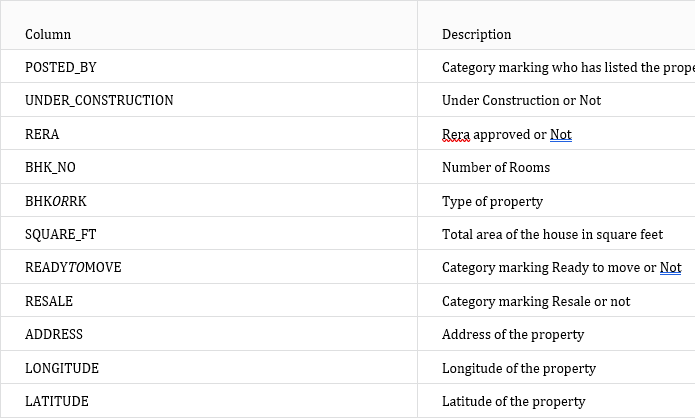

In [427]:
from IPython import display
display.Image("Attributes.png")

In [428]:
#import Data
House_train_data = pd.read_csv('House Price train.csv')

In [429]:
House_train_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [430]:
#get some information about our Data-Set
House_train_data.shape

(29451, 12)

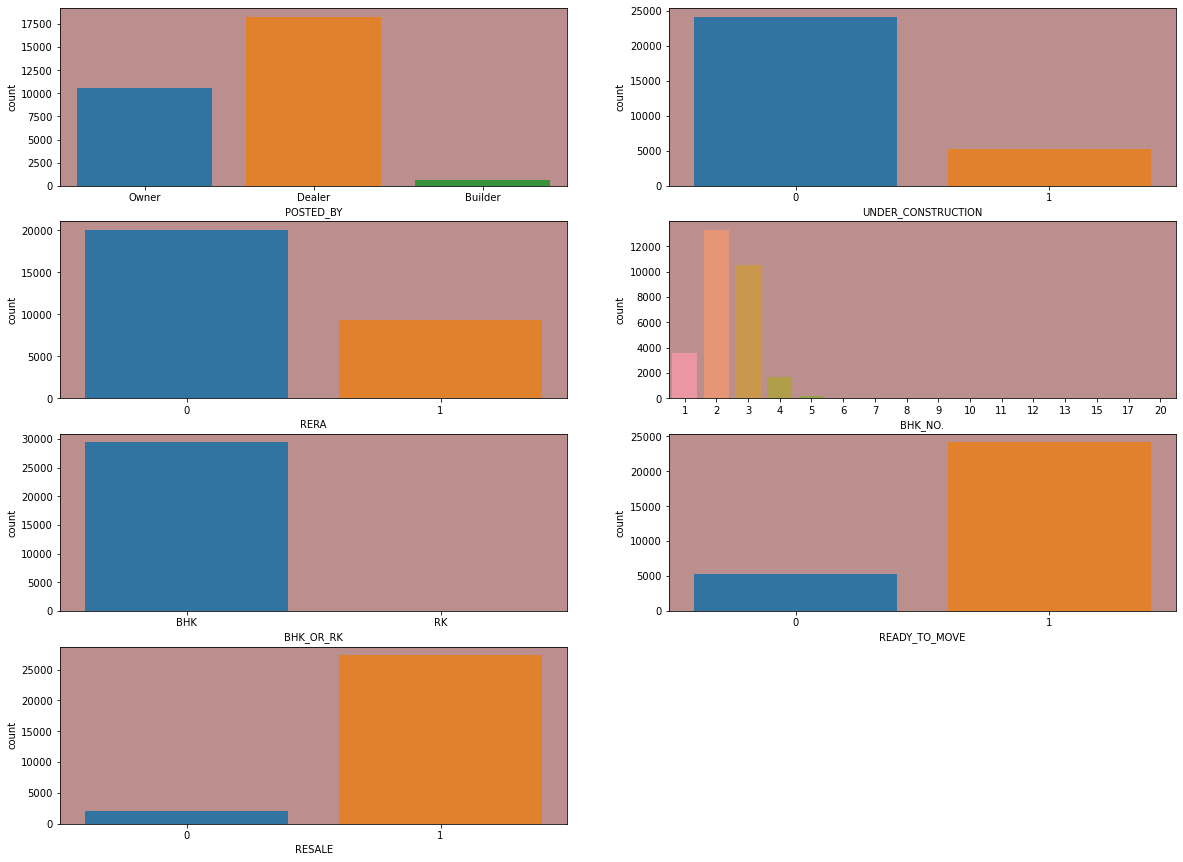

In [431]:
# Exploratory Data Analysis

i = 1
plt.figure(figsize=(20,15))
for col in ['POSTED_BY' , 'UNDER_CONSTRUCTION' , 'RERA' , 'BHK_NO.' , 'BHK_OR_RK' ,'READY_TO_MOVE' , 'RESALE']:
    plt.subplot(4,2,i)
    sns.countplot(House_train_data[col])
    i+=1

In [432]:
House_test_data = pd.read_csv('House Price test.csv')

In [433]:
House_test_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


In [434]:
House_test_data.shape

(68720, 11)

In [435]:
House_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [436]:
House_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [437]:
House_train_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [438]:
House_train_data.describe(include = "object")

,POSTED_BY,BHK_OR_RK,ADDRESS
count,29451,29451,29451
unique,3,2,6899
top,Dealer,BHK,"Zirakpur,Chandigarh"
freq,18291,29427,509


### Determining the number of entries

In [439]:
print("Total no of unique values available in POSTED_BY =" ,House_train_data["POSTED_BY"].nunique())
print("Uniques Data  that are available in 1st feature are = ",House_train_data["POSTED_BY"].unique())
print("Number of entries of Unique value available in POSTED_BY =" ,House_train_data["POSTED_BY"].value_counts())
type(House_train_data["POSTED_BY"])

Total no of unique values available in POSTED_BY = 3
Uniques Data  that are available in 1st feature are =  ['Owner' 'Dealer' 'Builder']
Number of entries of Unique value available in POSTED_BY = Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64


pandas.core.series.Series

In [440]:
House_train_data["POSTED_BY"] = House_train_data["POSTED_BY"].replace(to_replace=['Owner', 'Dealer','Builder'], value=[0,1,2])
House_test_data["POSTED_BY"]  = House_test_data["POSTED_BY"].replace(to_replace=['Owner', 'Dealer','Builder'], value=[0,1,2])

In [441]:
print("Total no of unique value available in UNDER_CONSTRUCTION =" ,House_train_data["UNDER_CONSTRUCTION"].nunique())
print("Uniques Data that are available in UNDER_CONSTRUCTION are = ",House_train_data["UNDER_CONSTRUCTION"].unique())
print("Number of entries of Unique value available in UNDER_CONSTRUCTION =" ,House_train_data["UNDER_CONSTRUCTION"].value_counts())
type(House_train_data["UNDER_CONSTRUCTION"])

Total no of unique value available in UNDER_CONSTRUCTION = 2
Uniques Data that are available in UNDER_CONSTRUCTION are =  [0 1]
Number of entries of Unique value available in UNDER_CONSTRUCTION = 0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64


pandas.core.series.Series

In [442]:
print("Total no of unique value available in RERA =" ,House_train_data["RERA"].nunique())
print("Uniques Data that are available in RERA are = ",House_train_data["RERA"].unique())
print("Number of entries of Unique value available in RERA =" ,House_train_data["RERA"].value_counts())
type(House_train_data["RERA"])

Total no of unique value available in RERA = 2
Uniques Data that are available in RERA are =  [0 1]
Number of entries of Unique value available in RERA = 0    20088
1     9363
Name: RERA, dtype: int64


pandas.core.series.Series

In [443]:
print("Total no of unique value available in BHK_NO.  =" ,House_train_data["BHK_NO."].nunique())
print("Uniques Data that are available in BHK_NO. are = ",House_train_data["BHK_NO."].unique())
print("Number of entries of Unique value available in BHK_NO. =" ,House_train_data["BHK_NO."].value_counts())
type(House_train_data["BHK_NO."])

Total no of unique value available in BHK_NO.  = 16
Uniques Data that are available in BHK_NO. are =  [ 2  3  1  4  5  6 12  8 20 10  7  9 13 17 15 11]
Number of entries of Unique value available in BHK_NO. = 2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
20        4
10        4
15        4
9         3
12        3
17        1
11        1
13        1
Name: BHK_NO., dtype: int64


pandas.core.series.Series

In [444]:
print("Total no of unique value available in BHK_OR_RK  =" ,House_train_data["BHK_OR_RK"].nunique())
print("Uniques Data that are available in BHK_OR_RK are = ",House_train_data["BHK_OR_RK"].unique())
print("Number of entries of Unique value available in BHK_OR_RK =" ,House_train_data["BHK_OR_RK"].value_counts())
type(House_train_data["BHK_OR_RK"])

Total no of unique value available in BHK_OR_RK  = 2
Uniques Data that are available in BHK_OR_RK are =  ['BHK' 'RK']
Number of entries of Unique value available in BHK_OR_RK = BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64


pandas.core.series.Series

## Conversion of the Unique data into binary type for the required calculations

In [445]:
House_train_data["BHK_OR_RK"] = House_train_data["BHK_OR_RK"].replace(to_replace=('BHK', 'RK'),value=[1,0])

In [446]:
print("Total no of unique value available in BHK_OR_RK  =" ,House_train_data["BHK_OR_RK"].nunique())
print("Uniques Data are that available in BHK_OR_RK are = ",House_train_data["BHK_OR_RK"].unique())
print("Number of entries of Unique value available in BHK_OR_RK =" ,House_train_data["BHK_OR_RK"].value_counts())
type(House_train_data["BHK_OR_RK"])

Total no of unique value available in BHK_OR_RK  = 2
Uniques Data are that available in BHK_OR_RK are =  [1 0]
Number of entries of Unique value available in BHK_OR_RK = 1    29427
0       24
Name: BHK_OR_RK, dtype: int64


pandas.core.series.Series

In [447]:
print("Total no of unique value available in SQUARE_FT  =" ,House_train_data["SQUARE_FT"].nunique())
print("Uniques Data that are available in SQUARE_FT are = ",House_train_data["SQUARE_FT"].unique())
print("Number of entries of Unique value available in SQUARE_FT =" ,House_train_data["SQUARE_FT"].value_counts())
type(House_train_data["SQUARE_FT"])

Total no of unique value available in SQUARE_FT  = 19561
Uniques Data that are available in SQUARE_FT are =  [1300.236407  1275.         933.1597222 ... 1022.641509   927.0790093
  896.7741935]
Number of entries of Unique value available in SQUARE_FT = 1000.000000    479
1250.000000    294
800.000000     202
1200.000000    179
1600.000000    125
              ... 
2200.303490      1
1170.311056      1
1360.092884      1
1532.097441      1
2090.492554      1
Name: SQUARE_FT, Length: 19561, dtype: int64


pandas.core.series.Series

In [448]:
print("Total no of unique value available in READY_TO_MOVE  =" ,House_train_data["READY_TO_MOVE"].nunique())
print("Uniques Data that are available in READY_TO_MOVE are = ",House_train_data["READY_TO_MOVE"].unique())
print("Number of entries of Unique value available in READY_TO_MOVE =" ,House_train_data["READY_TO_MOVE"].value_counts())
type(House_train_data["READY_TO_MOVE"])

Total no of unique value available in READY_TO_MOVE  = 2
Uniques Data that are available in READY_TO_MOVE are =  [1 0]
Number of entries of Unique value available in READY_TO_MOVE = 1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64


pandas.core.series.Series

In [449]:
print("Total no of unique value available in RESALE  =" ,House_train_data["RESALE"].nunique())
print("Uniques Data that are available in RESALE are = ",House_train_data["RESALE"].unique())
print("Number of entries of Unique value available in RESALE =" ,House_train_data["RESALE"].value_counts())


Total no of unique value available in RESALE  = 2
Uniques Data that are available in RESALE are =  [1 0]
Number of entries of Unique value available in RESALE = 1    27377
0     2074
Name: RESALE, dtype: int64


In [450]:
print("Total no of unique value available in ADDRESS  =" ,House_train_data["ADDRESS"].nunique())
print("Uniques Data that are available in ADDRESS are = ",House_train_data["ADDRESS"].unique())
print("Number of entries of Unique value available in ADDRESS =" ,House_train_data["ADDRESS"].value_counts())
type(House_train_data["ADDRESS"])

Total no of unique value available in ADDRESS  = 6899
Uniques Data that are available in ADDRESS are =  ['Ksfc Layout,Bangalore' 'Vishweshwara Nagar,Mysore' 'Jigani,Bangalore'
 ... 'west mambalam,Chennai' 'Gandhi Nagar,Gulbarga'
 'E3-108, Lake View Recidency,,Vapi']
Number of entries of Unique value available in ADDRESS = Zirakpur,Chandigarh              509
Whitefield,Bangalore             230
Raj Nagar Extension,Ghaziabad    215
Sector-137 Noida,Noida           139
New Town,Kolkata                 131
                                ... 
Shree Nagar,Belgaum                1
Vanzari Garbi Chowk,Junagadh       1
Bodhan,Nizamabad                   1
Khopoli,Raigarh                    1
Devi Nagar,Bangalore               1
Name: ADDRESS, Length: 6899, dtype: int64


pandas.core.series.Series

In [451]:
print("Total no of Unique value available in LONGITUDE  =" ,House_train_data["LONGITUDE"].nunique())
print("Uniques Data that are available in LONGITUDE are = ",House_train_data["LONGITUDE"].unique())
print("Number of entries of Unique value available in LONGITUDE =" ,House_train_data["LONGITUDE"].value_counts())
type(House_train_data["LONGITUDE"])

Total no of Unique value available in LONGITUDE  = 4087
Uniques Data that are available in LONGITUDE are =  [12.96991  12.274538 12.778033 ... 18.9737   17.357159 39.945409]
Number of entries of Unique value available in LONGITUDE = 24.690280    1009
12.969910     671
30.662283     509
22.541110     479
19.058710     242
             ... 
25.606371       1
20.802556       1
21.132949       1
21.183330       1
27.846364       1
Name: LONGITUDE, Length: 4087, dtype: int64


pandas.core.series.Series

In [452]:
print("Total no of Unique value available in LATITUDE  =" ,House_train_data["LATITUDE"].nunique())
print("Uniques Data that are available in LATITUDE are = ",House_train_data["LATITUDE"].unique())
print("Number of entries of Unique value available in LATITUDE =" ,House_train_data["LATITUDE"].value_counts())
type(House_train_data["LATITUDE"])

Total no of Unique value available in LATITUDE  = 4078
Uniques Data that are available in LATITUDE are =  [ 77.59796   76.644605  77.632191 ...  73.3321    76.841908 -86.150721]
Number of entries of Unique value available in LATITUDE = 78.418890    1009
77.597960     671
76.822397     509
88.337780     479
72.899690     242
             ... 
77.008060       1
77.501208       1
83.020674       1
80.189850       1
69.658066       1
Name: LATITUDE, Length: 4078, dtype: int64


pandas.core.series.Series

In [453]:
print("Total no of Unique value available in TARGET(PRICE_IN_LACS)  =" ,House_train_data["TARGET(PRICE_IN_LACS)"].nunique())
print("Uniques Data that are available in TARGET(PRICE_IN_LACS) are = ",House_train_data["TARGET(PRICE_IN_LACS)"].unique())
print("Number of entries of Unique value available in TARGET(PRICE_IN_LACS) =" ,House_train_data["TARGET(PRICE_IN_LACS)"].value_counts())
type(House_train_data["TARGET(PRICE_IN_LACS)"])

Total no of Unique value available in TARGET(PRICE_IN_LACS)  = 1172
Uniques Data that are available in TARGET(PRICE_IN_LACS) are =  [  55.    51.    43.  ... 1170.  8660.    18.3]
Number of entries of Unique value available in TARGET(PRICE_IN_LACS) = 110.0     795
100.0     770
120.0     652
130.0     598
45.0      583
         ... 
1890.0      1
248.0       1
1.5         1
7390.0      1
810.0       1
Name: TARGET(PRICE_IN_LACS), Length: 1172, dtype: int64


pandas.core.series.Series

# STEP 3 : DATA VISUALISATION

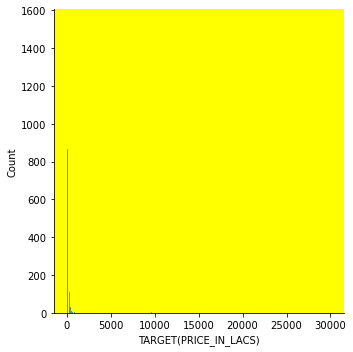

In [454]:
# Checking of outliers in TARGET(PRICE_in_lACS) of Train Data Set Column
plt.rcParams['axes.facecolor'] = "yellow"
sns.displot(House_train_data["TARGET(PRICE_IN_LACS)"])

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

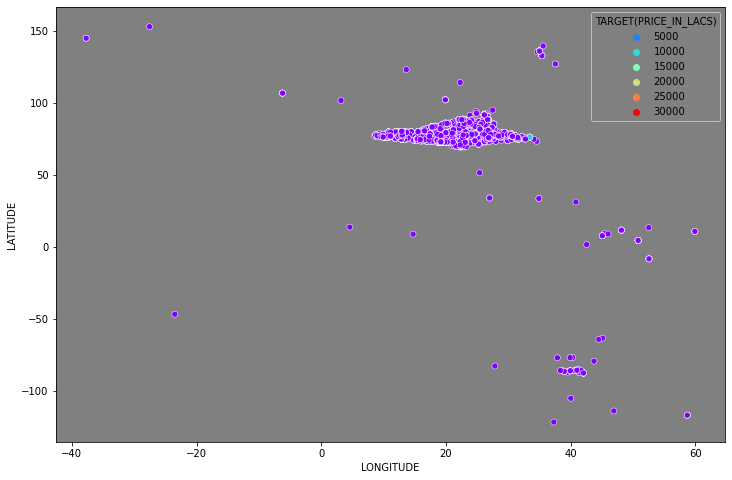

In [455]:
# Scatter Plot between Location (Latitude,Longitude) and Prices of the property to check the outliers
plt.figure(figsize=(12,8))
plt.rcParams['axes.facecolor'] = "gray"
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=House_train_data, hue="TARGET(PRICE_IN_LACS)",palette = 'rainbow')

<AxesSubplot:xlabel='SQUARE_FT', ylabel='Density'>

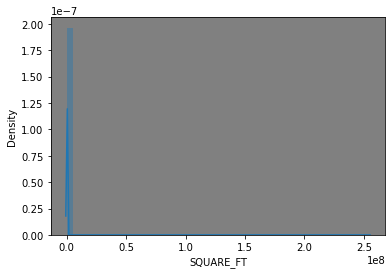

In [456]:
#Checking the outliers in square foot column
sns.distplot(House_train_data['SQUARE_FT'])

### Renaming the last column for our assistance

In [357]:
House_train_data = House_train_data.rename(columns = {'TARGET(PRICE_IN_LACS)' : 'TARGET'})

#    Removing the Outliers from Train Data

## Detecting outliers using quantile ranges

## What Are Quantiles?
### Quantiles are very easy to understand. Let’s say we have a series of 20 numbers. We can sort the numbers from lowest to highest. We can then group these points into quantiles, which are identified by cut points in the sorted data that describe the point below which X% of data falls.
 ### Note that quantiles are generally expressed as a fraction (from 0 to 1). They correspond exactly to percentiles, which range from 0 to 100.

In [358]:
Quant1= House_train_data.quantile(.25)
Quant2= House_train_data.median()
Quant3= House_train_data.quantile(.80)
IQR = Quant3 - Quant1
QMIN = Quant1 - 1.5*IQR
QMAX = Quant3 + 1.5*IQR

In [359]:
print("Quantile 1 = \n",Quant1)
print("\n\nQuantile 2 = \n ",Quant2)
print("\n\nQuantile 3 = \n",Quant3)
print("\n\nInter Quantile range = \n",IQR)
print("\n\nQ-MIN = \n",QMIN)
print("\n\nQ-MAX = \n",QMAX)

Quantile 1 = 
 POSTED_BY               0.000000
UNDER_CONSTRUCTION      0.000000
RERA                    0.000000
BHK_NO.                 2.000000
BHK_OR_RK               1.000000
SQUARE_FT             900.021130
READY_TO_MOVE           1.000000
RESALE                  1.000000
LONGITUDE              18.452663
LATITUDE               73.798100
TARGET                 38.000000
Name: 0.25, dtype: float64


Quantile 2 = 
  POSTED_BY                1.000000
UNDER_CONSTRUCTION       0.000000
RERA                     0.000000
BHK_NO.                  2.000000
BHK_OR_RK                1.000000
SQUARE_FT             1175.056750
READY_TO_MOVE            1.000000
RESALE                   1.000000
LONGITUDE               20.750000
LATITUDE                77.324137
TARGET                  62.000000
dtype: float64


Quantile 3 = 
 POSTED_BY                1.000000
UNDER_CONSTRUCTION       0.000000
RERA                     1.000000
BHK_NO.                  3.000000
BHK_OR_RK                1.000000
S

## -Quartiles, which divide the data into 25% groups. The first quartile represents the data points that fall in the lowest 25%, the second quartile points fall between 25% and 50%, and so forth.

## -Interquartile range, or IQR, which defines the range covered by 2nd and 3rd quartiles.

In [360]:
House_train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET
0,0,0,0,2,1,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,1,0,0,2,1,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,0,0,0,2,1,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,0,0,1,2,1,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,1,1,0,2,1,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [361]:
House_train_data = House_train_data[(House_train_data.TARGET>QMIN.TARGET)&(House_train_data.TARGET<QMAX.TARGET)]

In [362]:
House_train_data = House_train_data[(House_train_data.SQUARE_FT>QMIN.SQUARE_FT)&(House_train_data.SQUARE_FT<QMAX.SQUARE_FT)]

In [363]:
House_train_data = House_train_data[(House_train_data.LATITUDE>QMIN.LATITUDE)&(House_train_data.LATITUDE<QMAX.LATITUDE)]

In [364]:
House_train_data = House_train_data[(House_train_data.LONGITUDE>QMIN.LONGITUDE)&(House_train_data.LONGITUDE<QMAX.LATITUDE)]

In [365]:
House_train_data.shape

(24250, 12)

# Analysing the data through data Visualisation after the removal of outliers

## Distribution Plot

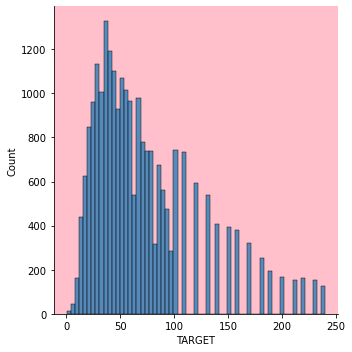

In [366]:
plt.rcParams['axes.facecolor'] = "pink"
sns.displot(House_train_data["TARGET"])

## Scatter Plot

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

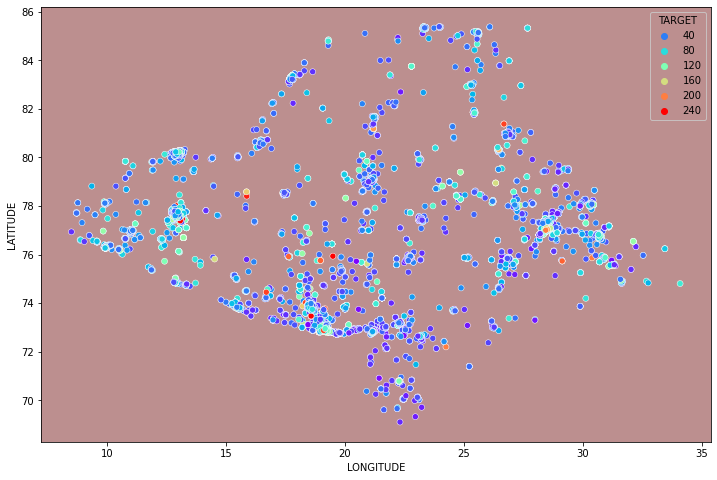

In [367]:
plt.figure(figsize=(12,8))
plt.rcParams['axes.facecolor'] = "RosyBrown"
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=House_train_data, hue="TARGET",palette = 'rainbow')

## Distribution Plot

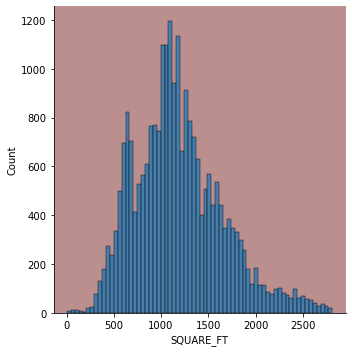

In [368]:
sns.displot(House_train_data['SQUARE_FT'])

# Heat Map
## Heatmaps are very useful to find relations between two variables in a dataset. Heatmap can be easily produced using the ‘heatmap’ function provided by the seaborn package in python.

<function matplotlib.pyplot.show(close=None, block=None)>

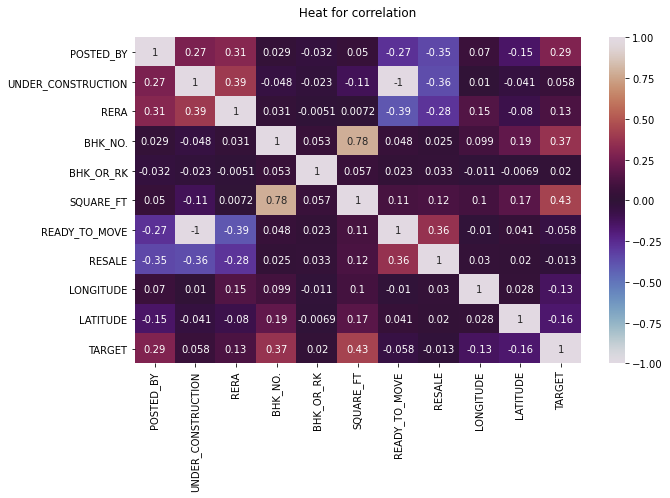

In [369]:
plt.figure(figsize = (10,6))
sns.heatmap(House_train_data.corr(), annot = True ,cmap='twilight')
plt.title(' Heat for correlation \n')
plt.show

### - From the Heatmap graph we can clearly see that there is a strong negative relationship between 'READY_TO_MOVE' and 'UNDER_CONSTRUCTION' which leads to multicollinearity. So we will remove one of them.
###  1. Since we have location based on the Longitude and Lattitude i.e why ADDRESS will be a wastaged attribute so now we can remove ADDRESS attribute too.
###  2. From the Heatmap we can clearly see that attribute 'BHK_OR_RK' isn't affecting our Target price so there is not significant to take it as a parameter, so we will remove this also.

# Now we will remove "READY_TO_MOVE","ADDRESS" and "BHK_OR_RK" from both Train and test data.

In [370]:
House_train_data = House_train_data.drop(['READY_TO_MOVE'],axis = 1, inplace=False)
House_train_data = House_train_data.drop(['ADDRESS'],axis = 1, inplace=False)
House_train_data = House_train_data.drop(['BHK_OR_RK'],axis = 1, inplace=False)

House_test_data = House_test_data.drop(['READY_TO_MOVE'],axis = 1, inplace=False)
House_test_data = House_test_data.drop(['ADDRESS'],axis = 1, inplace=False)
House_test_data = House_test_data.drop(['BHK_OR_RK'],axis = 1, inplace=False)

In [371]:
House_train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET
0,0,0,0,2,1300.236407,1,12.969910,77.597960,55.0
1,1,0,0,2,1275.000000,1,12.274538,76.644605,51.0
2,0,0,0,2,933.159722,1,12.778033,77.632191,43.0
3,0,0,1,2,929.921143,1,28.642300,77.344500,62.5
5,0,0,0,3,1250.000000,1,10.033280,76.282571,42.0


In [372]:
House_test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE
0,0,0,0,1,545.171340,1,21.262000,73.047700
1,1,1,1,2,800.000000,0,18.966114,73.148278
2,1,0,0,2,1257.096513,1,22.592200,88.484911
3,1,0,0,3,1400.329489,1,26.988300,75.584600
4,0,0,0,1,430.477830,1,22.700000,72.870000


In [373]:
House_train_data.describe()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET
count,24250.000000,24250.000000,24250.000000,24250.000000,24250.000000,24250.000000,24250.000000,24250.000000,24250.000000
mean,0.641361,0.178887,0.340165,2.268000,1187.273433,0.931794,21.071443,76.377199,71.590731
std,0.524146,0.383265,0.473774,0.752229,467.515519,0.252105,6.163195,2.615878,47.925090
min,0.000000,0.000000,0.000000,1.000000,3.985594,0.000000,8.513294,69.104114,0.290000
25%,0.000000,0.000000,0.000000,2.000000,861.090454,1.000000,16.096661,73.803330,36.500000
50%,1.000000,0.000000,0.000000,2.000000,1135.070181,1.000000,19.304050,77.000000,58.500000
75%,1.000000,0.000000,1.000000,3.000000,1459.053123,1.000000,26.988300,77.651295,92.000000
max,2.000000,1.000000,1.000000,20.000000,2811.142346,1.000000,34.091110,85.383545,240.000000


In [374]:
House_test_data.describe()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE
count,68720.000000,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000
mean,0.657203,0.176557,0.316531,2.388198,2.762419e+03,0.933498,21.288045,76.919388
std,0.514742,0.381296,0.465126,0.864577,1.640991e+05,0.249159,6.179034,10.100950
min,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,-38.391261,-118.354100
25%,0.000000,0.000000,0.000000,2.000000,9.000310e+02,1.000000,18.452663,73.798100
50%,1.000000,0.000000,0.000000,2.000000,1.174982e+03,1.000000,20.933260,77.324966
75%,1.000000,0.000000,1.000000,3.000000,1.550265e+03,1.000000,26.888396,78.000723
max,2.000000,1.000000,1.000000,31.000000,4.016393e+07,1.000000,65.183330,175.278040


# MODELING

## Applying Linear Regression Model on the House Price Train data File

In [375]:
X_train = House_train_data.drop('TARGET', axis = 1).values
Y_train = House_train_data['TARGET'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X_train, Y_train ,test_size=0.1, random_state=0)

In [376]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [377]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [378]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [379]:
LR.fit(X_train,Y_train)

LinearRegression()

In [380]:
print("The intercept value =", LR.intercept_)

The intercept value = 34.01436223143887


In [381]:
print("The coeffiecients are Theat 0 ,Theta 1, Theta 2 , Theta 3 =", LR.coef_)

The coeffiecients are Theat 0 ,Theta 1, Theta 2 , Theta 3 = [ 44.73736782   3.4711549    6.66356155 148.34717312 105.94836093
  12.6220286  -40.8688877  -59.32815402]


In [382]:
Predict = LR.predict(X_test)

In [383]:
Predict

array([110.61848344,  70.49758077,  53.51686777, ..., 120.20529015,
       116.34288211, 104.43078494])

In [384]:
from sklearn.metrics import r2_score

In [385]:
r2_score(Y_test,Predict)

0.035235387013067165

In [386]:
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error,r2_score

In [387]:
Y_predict = LR.predict(X_test).reshape(X_test.shape[0])


predict_df = pd.DataFrame({ 'Actual_value': Y_test, 'Predicted value': Y_predict})
print(predict_df)

      Actual_value  Predicted value
0            110.0       110.618483
1             52.0        70.497581
2             28.0        53.516868
3            150.0       127.908138
4             90.0       142.658157
...            ...              ...
2420         140.0       135.708165
2421          92.0       115.540633
2422          59.8       120.205290
2423          95.0       116.342882
2424          30.0       104.430785

[2425 rows x 2 columns]


## MAE

In [388]:
mean_absolute_error(y_true=predict_df['Actual_value'], y_pred=predict_df['Predicted value'])

39.63279287283993

## MSE

In [389]:
print(mean_squared_error(y_true=predict_df['Actual_value'], y_pred=predict_df['Predicted value']))

2303.613972229608


## RMSE

In [390]:
print(np.sqrt(mean_squared_error(y_true=predict_df['Actual_value'], y_pred=predict_df['Predicted value'])))

47.995978708946105


## VARIANCE SCORE

In [391]:
from sklearn.metrics import explained_variance_score
explained_variance_score(Y_test,Predict)

0.27416121499459556

## R2_SCORE

In [392]:
R_Squared = r2_score(Y_test,Predict)
R_Squared

0.035235387013067165

# Now Applying Linear Regression Model on the House Price Test data File

In [393]:
House_test_data1 = House_test_data

In [394]:
Quant11 = House_test_data1.quantile(.35)
Quant21 = House_test_data1.median()
Quant31 = House_test_data1.quantile(.60)
IQR1 = Quant31 - Quant11
QMIN1 = Quant11 - 1.5*IQR1
QMAX1 = Quant31 + 1.5*IQR1

In [395]:
House_test_data1 = House_test_data1[(House_test_data1.SQUARE_FT>QMIN1.SQUARE_FT)&(House_test_data1.SQUARE_FT<QMAX1.SQUARE_FT)]
House_test_data1.shape

(51687, 8)

In [396]:
House_test_data1 = House_test_data1[(House_test_data1.LONGITUDE>QMIN1.LONGITUDE)&(House_test_data1.LONGITUDE<QMAX1.LONGITUDE)]
House_test_data1.shape

(30668, 8)

In [397]:
House_test_data1 = House_test_data1[(House_test_data1.LATITUDE>QMIN1.LATITUDE)&(House_test_data1.LATITUDE<QMAX1.LATITUDE)]
House_test_data1.shape

(12295, 8)

In [398]:
X2_test = House_test_data1.values
X2_test

array([[ 1.      ,  0.      ,  0.      , ...,  1.      , 26.9883  ,
        75.5846  ],
       [ 1.      ,  0.      ,  0.      , ...,  1.      , 19.032025,
        73.621535],
       [ 1.      ,  0.      ,  0.      , ...,  1.      , 24.69028 ,
        78.41889 ],
       ...,
       [ 1.      ,  0.      ,  0.      , ...,  1.      , 18.510861,
        73.926175],
       [ 1.      ,  0.      ,  0.      , ...,  1.      , 19.085225,
        73.661835],
       [ 1.      ,  0.      ,  0.      , ...,  1.      , 18.49667 ,
        73.94167 ]])

In [399]:
X2_test = scaler.transform(X2_test)

In [400]:
Pred1 = LR.predict(X2_test)

In [401]:
Pred1

array([125.00098291,  60.97777236,  73.78911655, ...,  97.70006978,
        98.65232479, 107.52692137])

In [402]:
Testdata = pd.DataFrame({'Target':Pred1})
Testdata

,Target
0,125.000983
1,60.977772
2,73.789117
3,85.507010
4,103.142295
...,...
12290,103.632541
12291,133.468203
12292,97.700070
12293,98.652325


<AxesSubplot:>

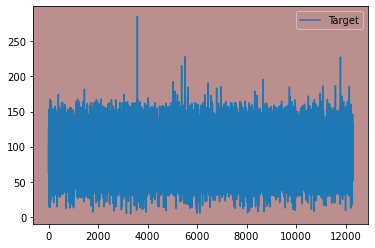

In [403]:
Testdata.plot()

# Applying next model i.e Decision Tree on the House Price Train data File

In [404]:
#Importing Decision tree
from sklearn.tree import DecisionTreeRegressor

In [405]:
decision_tree_model= DecisionTreeRegressor()

In [406]:
decision_tree_model.fit(X_train,Y_train)
y_prediction_tree=decision_tree_model.predict(X_train)

In [407]:
y_prediction_tree_test=decision_tree_model.predict(X_test)
y_prediction_tree_test

array([57.3, 42. , 30.7, ..., 30. , 73. , 33. ])

## RMSE and R2_square

In [408]:
print("RMSE:",np.sqrt(mean_squared_error(Y_train,y_prediction_tree)))
print("R_square:",r2_score(Y_train,y_prediction_tree))

RMSE: 1.942251854665174
R_square: 0.9983501066861239


# Now Applying Decision Tree Model on the House Price Test data File

In [409]:
Pred2 = decision_tree_model.predict(X2_test)

In [410]:
Pred2

array([150.,  45.,  86., ...,  60.,  60.,  58.])

In [411]:
Testdata1 = pd.DataFrame({'Target1':Pred2})
Testdata1

,Target1
0,150.0
1,45.0
2,86.0
3,32.0
4,55.0
...,...
12290,56.9
12291,26.0
12292,60.0
12293,60.0


<AxesSubplot:>

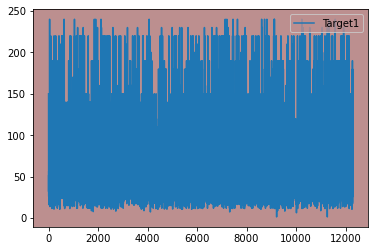

In [412]:
Testdata1.plot()

# Model Evaluation

In [413]:
print("Linear Regression - R_Square: ",r2_score(Y_test,Predict))
print("Decison Tree - R_Square:",r2_score(Y_train,y_prediction_tree))

Linear Regression - R_Square:  0.035235387013067165
Decison Tree - R_Square: 0.9983501066861239


In [414]:
print("Linear Regression - RMSE",np.sqrt(mean_squared_error(y_true=predict_df['Actual_value'], y_pred=predict_df['Predicted value'])))
print("Decison Tree - RMSE:",np.sqrt(mean_squared_error(Y_train,y_prediction_tree)))

Linear Regression - RMSE 47.995978708946105
Decison Tree - RMSE: 1.942251854665174


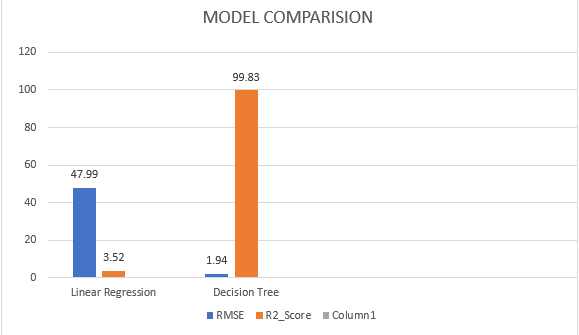

In [457]:
display.Image("Compare.png")

# Conclusion

After going through a bunch of processes, we have successfully built and evaluated on two models that is linear regression model and Decision Tree in python also, choosing the best model for our given dataset. But, this won’t stop here. Each and every model we built have their own statistical and mathematical concepts.

R-Squared is measurement of how well the dependent variable explains the variance of the independent variable. It is most popular evaluation metric for regression models. The ideal 'r2_score' of a model should be more than 0.70 (at least greater than 0.60).

We can see that, our first model i.e. Linear Regression by rounding the output values will result in a score of 0.035, similarly while rounding the outout values for Decision Tree Model will result in a score of 0.998, which means our Decison Tree model performs well on our dataset as comparison to Linear Regression.

Comparing RMSE, the model which is having the less RMSE, will be the best performing model. In our case, Linear Regression by rounding the output values will give 47.99 while the Decision Tree will give RMSE of 1.94. This implies Decision Tree performs better in this case as well.

Coming to the case of choosing the best model, Decision Tree is the best performer and the Linear Regression is the worst performer.